## Lab | Handling Data Imbalance in Classification Models
    For this lab and in the next lessons we will build a model on customer churn binary classification problem. You will be using files_for_lab/Customer-Churn.csv file.

    Scenario
    You are working as an analyst with this internet service provider. You are provided with this historical data about your company's customers and their churn trends. Your task is to build a machine learning model that will help the company identify customers that are more likely to default/churn and thus prevent losses from such customers.

    Instructions
    In this lab, we will first take a look at the degree of imbalance in the data and correct it using the techniques we learned on the class.

    Here is the list of steps to be followed (building a simple model without balancing the data):

        > Import the required libraries and modules that you would need.
        > Read that data into Python and call the dataframe churnData.
        > Check the datatypes of all the columns in the data. You would see that the column TotalCharges is object type. Convert this column into numeric type using pd.to_numeric function.
            >> Check for null values in the dataframe. Replace the null values.
            >> Use the following features: tenure, SeniorCitizen, MonthlyCharges and TotalCharges:
                >>> Scale the features either by using normalizer or a standard scaler.
                >>> Split the data into a training set and a test set.
                >>> Fit a logistic regression model on the training data.
                >>> Check the accuracy on the test data... Note: So far we have not balanced the data.

    Managing imbalance in the dataset

        Check for the imbalance.
        Use the resampling strategies used in class for upsampling and downsampling to create a balance between the two classes.
        Each time fit the model and see how the accuracy of the model is.

#### Import the required libraries and modules that you would need.

In [1]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

#### Read that data into Python and call the dataframe churnData.


In [2]:
data = pd.read_csv('files_for_lab/Customer-Churn.csv')
display(data)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,No,No,No,No,No,No,Month-to-month,74.40,306.6,Yes


#### > Check the datatypes of all the columns in the data. You would see that the column TotalCharges is object type. Convert this column into numeric type using pd.to_numeric function.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   OnlineSecurity    7043 non-null   object 
 7   OnlineBackup      7043 non-null   object 
 8   DeviceProtection  7043 non-null   object 
 9   TechSupport       7043 non-null   object 
 10  StreamingTV       7043 non-null   object 
 11  StreamingMovies   7043 non-null   object 
 12  Contract          7043 non-null   object 
 13  MonthlyCharges    7043 non-null   float64
 14  TotalCharges      7043 non-null   object 
 15  Churn             7043 non-null   object 
dtypes: float64(1), int64(2), object(13)
memory

In [4]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

#### Checking the results

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   OnlineSecurity    7043 non-null   object 
 7   OnlineBackup      7043 non-null   object 
 8   DeviceProtection  7043 non-null   object 
 9   TechSupport       7043 non-null   object 
 10  StreamingTV       7043 non-null   object 
 11  StreamingMovies   7043 non-null   object 
 12  Contract          7043 non-null   object 
 13  MonthlyCharges    7043 non-null   float64
 14  TotalCharges      7032 non-null   float64
 15  Churn             7043 non-null   object 
dtypes: float64(2), int64(2), object(12)
memory

#### Check for null values in the dataframe. Replace the null values.


In [6]:
data['TotalCharges'].value_counts(normalize=False, sort=True, ascending=False, dropna=False)

NaN        11
20.20      11
19.75       9
19.90       8
19.65       8
           ..
1066.15     1
249.95      1
8333.95     1
7171.70     1
1024.00     1
Name: TotalCharges, Length: 6531, dtype: int64

##### Filling NaN's with the mean

In [7]:
data['TotalCharges'] = data['TotalCharges'].fillna((np.mean(data['TotalCharges'])))

##### Checking the results

In [8]:
data['TotalCharges'].value_counts(normalize=False, sort=True, ascending=False, dropna=False)

20.200000      11
2283.300441    11
19.750000       9
19.900000       8
19.650000       8
               ..
1066.150000     1
249.950000      1
8333.950000     1
7171.700000     1
1024.000000     1
Name: TotalCharges, Length: 6531, dtype: int64

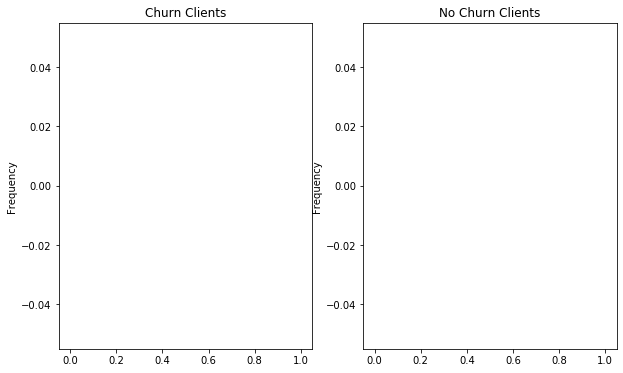

In [9]:
Yes_churn = data[data["Churn"]==1]
No_churn= data[data["Churn"]==0]

plt.figure(figsize=(10,6))
plt.subplot(121)
Yes_churn.tenure.plot.hist(title="Churn Clients")
plt.subplot(122)
No_churn.tenure.plot.hist(title="No Churn Clients")

#### Use the following features: tenure, SeniorCitizen, MonthlyCharges and TotalCharges:


In [10]:
data_t = pd.DataFrame(data, columns =['tenure', 'SeniorCitizen', 'MonthlyCharges','TotalCharges']) 

In [11]:
display(data_t)

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges
0,1,0,29.85,29.85
1,34,0,56.95,1889.50
2,2,0,53.85,108.15
3,45,0,42.30,1840.75
4,2,0,70.70,151.65
...,...,...,...,...
7038,24,0,84.80,1990.50
7039,72,0,103.20,7362.90
7040,11,0,29.60,346.45
7041,4,1,74.40,306.60


In [12]:
data['Churn'] = pd.Series(np.where(data['Churn'].values == 'Yes', 1, 0))

In [13]:
data['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

    Scale the features either by using normalizer or a standard scaler

#### StandardScaler

In [14]:
#transformer = StandardScaler().fit(data_t.iloc[:,:])
#x_standardized = transformer.transform(data_t.iloc[:,:])

In [15]:
#data_t_standardized = pd.DataFrame(x_standardized,columns=data_t.columns.tolist()[:])
#data_t_standardized.head()
#X = data_t_standardized
#y = data['Churn']

#### Normalizer

In [16]:
transformer = Normalizer().fit(data_t.iloc[:,:])
x_normalized = transformer.transform(data_t.iloc[:,:])

In [17]:
data_t_normalized = pd.DataFrame(x_normalized,columns=data_t.columns.tolist()[:])
data_t_normalized.head()
X = data_t_normalized
y = data['Churn']

In [18]:
display(data_t_normalized)

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges
0,0.023682,0.000000,0.706908,0.706908
1,0.017983,0.000000,0.030122,0.999384
2,0.016552,0.000000,0.445662,0.895048
3,0.024433,0.000000,0.022967,0.999438
4,0.011952,0.000000,0.422512,0.906279
...,...,...,...,...
7038,0.012045,0.000000,0.042561,0.999021
7039,0.009777,0.000000,0.014014,0.999854
7040,0.031620,0.000000,0.085085,0.995872
7041,0.012677,0.003169,0.235798,0.971714


In [19]:
display(data['Churn'])

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int32

    Split the data into a training set and a test set

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

Intercept: [-5.21194925]
Regression: [[-6.83521387  0.41499447  4.64341421  3.78837974]]
Accuracy of logistic regression classifier on test set: 0.76
              precision    recall  f1-score   support

           0       0.78      0.94      0.85      1547
           1       0.61      0.27      0.37       566

    accuracy                           0.76      2113
   macro avg       0.69      0.60      0.61      2113
weighted avg       0.73      0.76      0.72      2113



Text(0.5, 15.0, 'Predicted label')

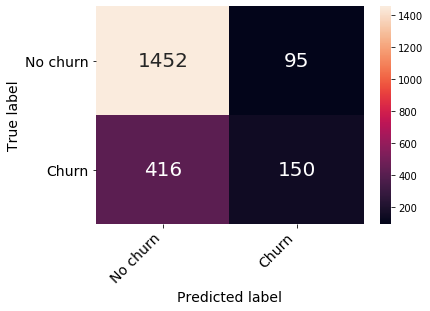

In [21]:
logisticRegr = LogisticRegression()
logisticRegr.fit(X=X_train, y=y_train)
 
test_y_pred = logisticRegr.predict(X_test)
confusion_mx = confusion_matrix(y_test, test_y_pred)
print('Intercept: ' + str(logisticRegr.intercept_))
print('Regression: ' + str(logisticRegr.coef_))
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logisticRegr.score(X_test, y_test)))
print(classification_report(y_test, test_y_pred))
 
confusion_matrix_df = pd.DataFrame(confusion_mx, ('No churn', 'Churn'), ('No churn', 'Churn'))
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={"size": 20}, fmt="d")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize = 14)
plt.ylabel('True label', fontsize = 14)
plt.xlabel('Predicted label', fontsize = 14)

In [22]:
display(type(X))
display(type(y))
display(type(X_train))
display(type(y_train))
display(type(X_test))
display(type(y_test))
display(type(test_y_pred))

pandas.core.frame.DataFrame

pandas.core.series.Series

pandas.core.frame.DataFrame

pandas.core.series.Series

pandas.core.frame.DataFrame

pandas.core.series.Series

numpy.ndarray

#### Alternate Approach

    Fit a logistic regression model on the training data

In [23]:
logistic_model = LogisticRegression(random_state=0)
logistic_model.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [24]:
display(logistic_model)
display(X_test)
display(y_test)

LogisticRegression(random_state=0)

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges
4880,0.046772,0.000000,0.019223,0.998721
1541,0.050138,0.000000,0.013823,0.998647
1289,0.015319,0.000000,0.016730,0.999743
5745,0.042165,0.000000,0.016728,0.998971
4873,0.047815,0.000000,0.131834,0.990118
...,...,...,...,...
1285,0.010254,0.001465,0.131111,0.991314
5092,0.045964,0.000000,0.134282,0.989877
5837,0.018245,0.000000,0.468899,0.883063
3597,0.010682,0.000000,0.040890,0.999107


4880    0
1541    0
1289    0
5745    0
4873    0
       ..
1285    1
5092    0
5837    0
3597    0
3625    0
Name: Churn, Length: 2113, dtype: int32

In [25]:
logistic_predictions = logistic_model.predict(X_test)

    Check the accuracy on the test data

In [26]:
MAE = mean_absolute_error(y_test,logistic_predictions)
MSE = mean_squared_error(y_test,logistic_predictions)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test,logistic_predictions)

print("The mean absolute error of the model in the test set is: %6.2f" % (MAE))
print("The mean squared error of the model in the test set is: %6.2f" % (MSE))
print("The root mean squared error of the model in the test set is: %6.2f" % (RMSE))
print("The R2 of the model in the test set is: %4.2f" % (R2))

The mean absolute error of the model in the test set is:   0.24
The mean squared error of the model in the test set is:   0.24
The root mean squared error of the model in the test set is:   0.49
The R2 of the model in the test set is: -0.23


## Managing imbalance in the dataset

In [27]:
data['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

## Downsampling

In [28]:
data_d = pd.concat([X,y], axis=1)
display(data_d)


,tenure,SeniorCitizen,MonthlyCharges,TotalCharges,Churn
0,0.023682,0.000000,0.706908,0.706908,0
1,0.017983,0.000000,0.030122,0.999384,0
2,0.016552,0.000000,0.445662,0.895048,1
3,0.024433,0.000000,0.022967,0.999438,0
4,0.011952,0.000000,0.422512,0.906279,1
...,...,...,...,...,...
7038,0.012045,0.000000,0.042561,0.999021,0
7039,0.009777,0.000000,0.014014,0.999854,0
7040,0.031620,0.000000,0.085085,0.995872,0
7041,0.012677,0.003169,0.235798,0.971714,1


In [29]:
category_0 = data_d[data_d['Churn']==0].sample(len(data_d[data_d['Churn']==1]))
print(category_0.shape)

category_1 = data_d[data_d['Churn']== 1 ]
data_e = pd.concat([category_0, category_1], axis = 0)
data_e = data_e.sample(frac =1)
data_e = data_e.reset_index(drop=True)
print(data_e.shape)

(1869, 5)
(3738, 5)


    Split the data into a training set and a test set

In [30]:
display(data_e.iloc[:,:-1])

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges
0,0.019061,0.000000,0.046960,0.998715
1,0.015296,0.000000,0.090249,0.995802
2,0.010861,0.000000,0.031529,0.999444
3,0.012448,0.001383,0.110028,0.993850
4,0.035422,0.000000,0.706663,0.706663
...,...,...,...,...
3733,0.011168,0.000000,0.283297,0.958967
3734,0.010093,0.000000,0.020402,0.999741
3735,0.009912,0.000000,0.088171,0.996056
3736,0.013918,0.000000,0.707038,0.707038


In [31]:
X = data_e.iloc[:,:-1]
y = data_e['Churn']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [33]:
display(type(X))
display(type(y))
#display(type(X_train))
#display(type(y_train))
#display(type(X_test))
#display(type(y_test))
#display(type(test_y_pred))

pandas.core.frame.DataFrame

pandas.core.series.Series

Intercept: [-2.84951553]
Regression: [[-4.56518208  0.18412495  3.96875303  2.41948936]]
Accuracy of logistic regression classifier on test set: 0.68
              precision    recall  f1-score   support

           0       0.63      0.89      0.73       551
           1       0.82      0.49      0.61       571

    accuracy                           0.68      1122
   macro avg       0.72      0.69      0.67      1122
weighted avg       0.72      0.68      0.67      1122



Text(0.5, 15.0, 'Predicted label')

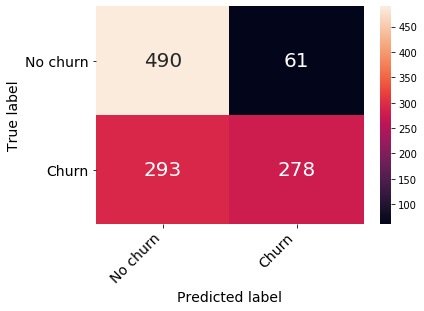

In [34]:
logisticRegr = LogisticRegression()
logisticRegr.fit(X=X_train, y=y_train)
 
test_y_pred = logisticRegr.predict(X_test)
confusion_mx = confusion_matrix(y_test, test_y_pred)
print('Intercept: ' + str(logisticRegr.intercept_))
print('Regression: ' + str(logisticRegr.coef_))
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logisticRegr.score(X_test, y_test)))
print(classification_report(y_test, test_y_pred))
 
confusion_matrix_df = pd.DataFrame(confusion_mx, ('No churn', 'Churn'), ('No churn', 'Churn'))
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={"size": 20}, fmt="d")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize = 14)
plt.ylabel('True label', fontsize = 14)
plt.xlabel('Predicted label', fontsize = 14)

# Upsampling

In [36]:
category_0 = data_d[data_d['Churn'] == 0]
category_1 = data_d[data_d['Churn'] == 1]

# Upsampling 
# As we are going to repeat observations, the random samples can be picked more then once,
# threfore we need to use the keyword: replace=True
category_1 = category_1.sample(len(category_0), replace=True)  
print(category_1.shape)

data_f = pd.concat([category_0, category_1], axis=0)
#shuffling the data
data_f = data_f.sample(frac=1)
print(data_f['Churn'].value_counts())

(5174, 5)
1    5174
0    5174
Name: Churn, dtype: int64


    Split the data into a training set and a test set

In [37]:
display(data_f.iloc[:,:-1])

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges
2156,0.009952,0.000000,0.400825,0.916101
1704,0.007089,0.000000,0.707089,0.707089
5016,0.045466,0.000000,0.180501,0.982523
751,0.012497,0.000000,0.014310,0.999820
2620,0.013828,0.000000,0.052507,0.998525
...,...,...,...,...
5816,0.022973,0.000000,0.341530,0.939590
1958,0.011703,0.000000,0.041376,0.999075
54,0.013461,0.000224,0.016792,0.999768
3332,0.015271,0.000000,0.707024,0.707024


In [38]:
X = data_f.iloc[:,:-1]
y = data_f['Churn']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [40]:
display(type(X))
display(type(y))
#display(type(X_train))
#display(type(y_train))
#display(type(X_test))
#display(type(y_test))
#display(type(test_y_pred))

pandas.core.frame.DataFrame

pandas.core.series.Series

Intercept: [-5.90932298]
Regression: [[-11.15480072   0.41998577   5.52911833   5.52163482]]
Accuracy of logistic regression classifier on test set: 0.68
              precision    recall  f1-score   support

           0       0.64      0.85      0.73      1587
           1       0.76      0.49      0.60      1518

    accuracy                           0.68      3105
   macro avg       0.70      0.67      0.66      3105
weighted avg       0.70      0.68      0.66      3105



Text(0.5, 15.0, 'Predicted label')

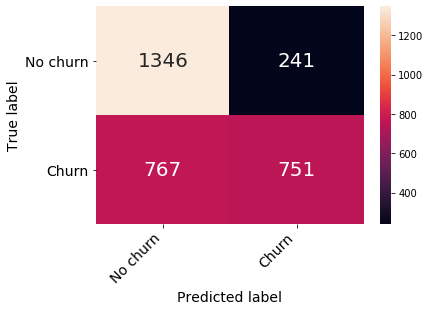

In [41]:
logisticRegr = LogisticRegression()
logisticRegr.fit(X=X_train, y=y_train)
 
test_y_pred = logisticRegr.predict(X_test)
confusion_mx = confusion_matrix(y_test, test_y_pred)
print('Intercept: ' + str(logisticRegr.intercept_))
print('Regression: ' + str(logisticRegr.coef_))
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logisticRegr.score(X_test, y_test)))
print(classification_report(y_test, test_y_pred))
 
confusion_matrix_df = pd.DataFrame(confusion_mx, ('No churn', 'Churn'), ('No churn', 'Churn'))
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={"size": 20}, fmt="d")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize = 14)
plt.ylabel('True label', fontsize = 14)
plt.xlabel('Predicted label', fontsize = 14)